In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [2]:
datos=pd.read_csv('train.csv')

In [3]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
datos.shape

(7613, 5)

In [6]:
datos.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# Analisis de los Hashtags

In [7]:
def separarPuntuacion(x):
  puntuacion="@!?+&*[]-%.:/();$=><|{}^" + "'`"
  for p in puntuacion:
    x=x.replace(p, f' {p} ')
  return x 

def limpiarTextoParaHashtag(x):
    x = re.sub(r"\x89Û_", "", x)
    x = re.sub(r"\x89ÛÒ", "", x)
    x = re.sub(r"\x89ÛÓ", "", x)
    x = re.sub(r"\x89ÛÏWhen", "when", x)
    x = re.sub(r"\x89ÛÏ", "", x)
    x = re.sub(r"China\x89Ûªs", "chinas", x)
    x = re.sub(r"let\x89Ûªs", "lets", x)
    x = re.sub(r"\x89Û÷", "", x)
    x = re.sub(r"\x89Ûª", "", x)
    x = re.sub(r"\x89Û\x9d", "", x)
    x = re.sub(r"å_", "", x)
    x = re.sub(r"\x89Û¢", "", x)
    x = re.sub(r"\x89Û¢åÊ", "", x)
    x = re.sub(r"fromåÊwounds", "from wounds", x)
    x = re.sub(r"åÊ", "", x)
    x = re.sub(r"åÈ", "", x)
    x = re.sub(r"JapÌ_n", "japan", x)    
    x = re.sub(r"Ì©", "e", x)
    x = re.sub(r"å¨", "", x)
    x = re.sub(r"SuruÌ¤", "suruc", x)
    x = re.sub(r"åÇ", "", x)
    x = re.sub(r"å£3million", "3 million", x)
    x = re.sub(r"åÀ", "", x) #Saco Links
    x = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", x)
    x=re.sub(r"yyc","calgaryairport",x)
    x=re.sub(r"yycstorm","calgaryairportstorm",x)
    x=re.sub(r"MH370", "malaysiaairlinesflight370",x)
    x=re.sub(r"tcot","topconservativesontwitter",x)
    x=re.sub(r"WX","weather",x)
    x=re.sub(r"abstorm","albertastorm",x)
    x=re.sub(r"mÌ¼sica", "music", x)
    x=re.sub(r"okwx", "oklahomacityweather", x)
    x=re.sub(r"arwx", "arkansasweather", x)    
    x=re.sub(r"gawx", "georgiaweather", x)  
    x=re.sub(r"scwx", "southcarolinaweather", x)  
    x=re.sub(r"cawx", "californiaweather", x)
    x=re.sub(r"tnwx", "tennesseeweather", x)
    x=re.sub(r"azwx", "arizonaweather", x)  
    x=re.sub(r"alwx", "alabamaweather", x)
    x=re.sub(r"wordpressdotcom", "wordpress", x)    
    x=re.sub(r"usNWSgov", "unitedstatesnationalweatherservice", x)
    x=re.sub(r"Suruc", "sanliurfa", x)
    x=re.sub(r"US","unitedstates",x)
    x=re.sub(r"Japanjapan","japan",x)
    x=re.sub(r"RT","retweet",x)
    x=re.sub(r"##","#",x)
    x=re.sub(r"###","#",x)
    x=re.sub(r"GBBO","thegreatbritishbakeoff",x)
    x=re.sub(r"BB17","bigbrother17",x)
    x=re.sub(r"np","nowplaying",x)
    x=re.sub(r"DnB","drumandbass",x)
    x=re.sub(r"EDM","electronicdancemusic",x)
    z=re.sub(r"TBT","throwbackthursday",x)
    return x
def obtenerLista(x):
  aux=list(x.split(" "))
  return aux

def obtenerHastag(x):
  x=limpiarTextoParaHashtag(x)
  x=separarPuntuacion(x)
  palabra=""
  aux=obtenerLista(x)
  for w in aux:
    if(w!="" and w[0]=="#"):
      palabra=palabra+ " " +w[1:len(w)]   
  return palabra

In [8]:
datos["hashtags"]=datos["text"].apply(obtenerHastag)

In [9]:
texto=datos[datos['hashtags']!=""]['hashtags'].agg('sum')

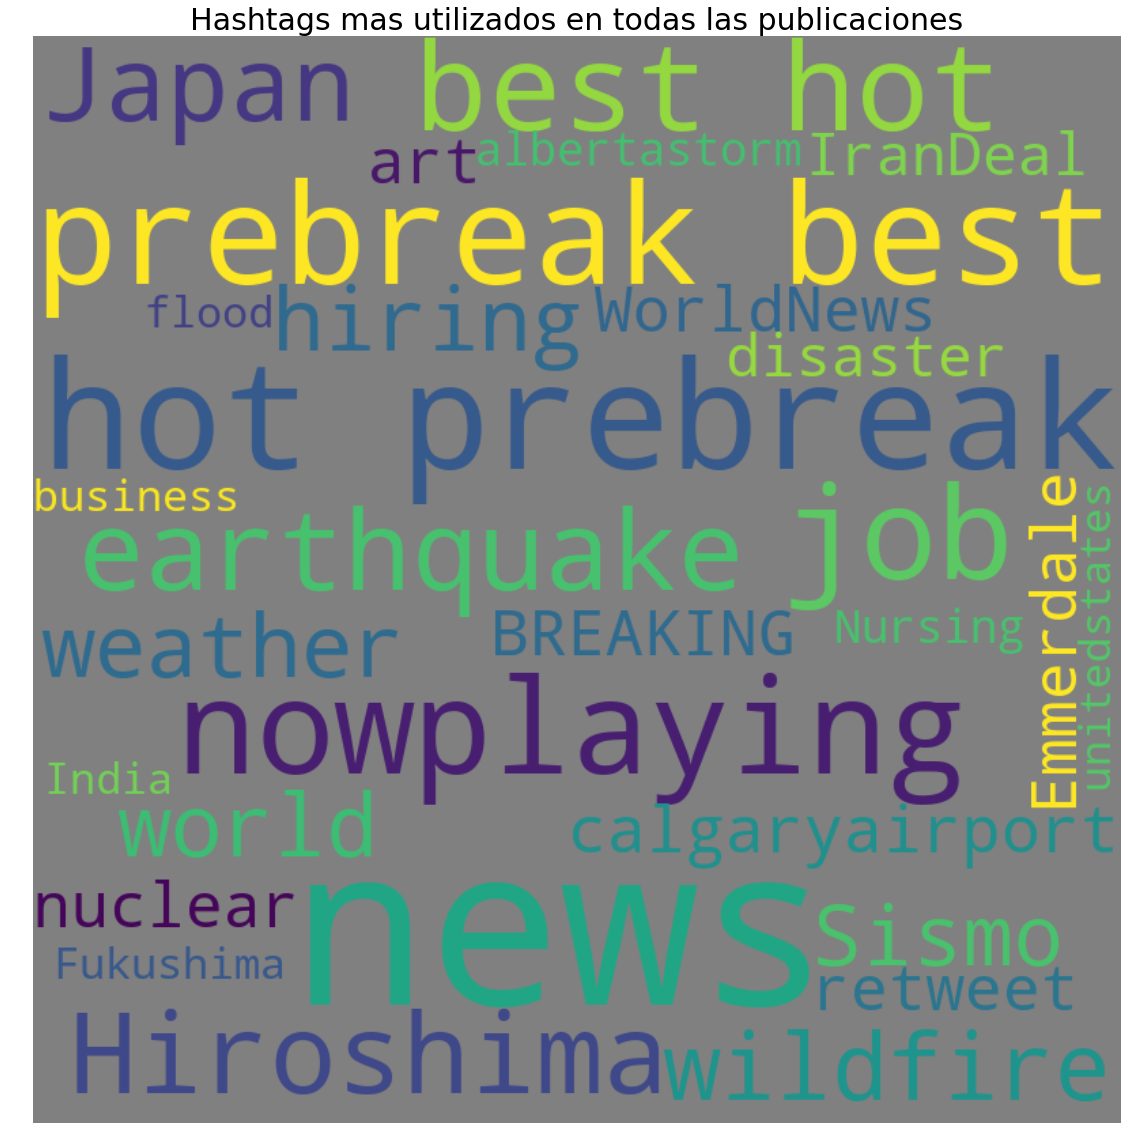

In [11]:
wordcloud = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="grey").generate(texto)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en todas las publicaciones',size=30)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_0.png",bbox_inch='tight')
plt.show()

In [12]:
textDesastre=datos[(datos['target']==1)&(datos['hashtags']!="")]['hashtags'].agg('sum')

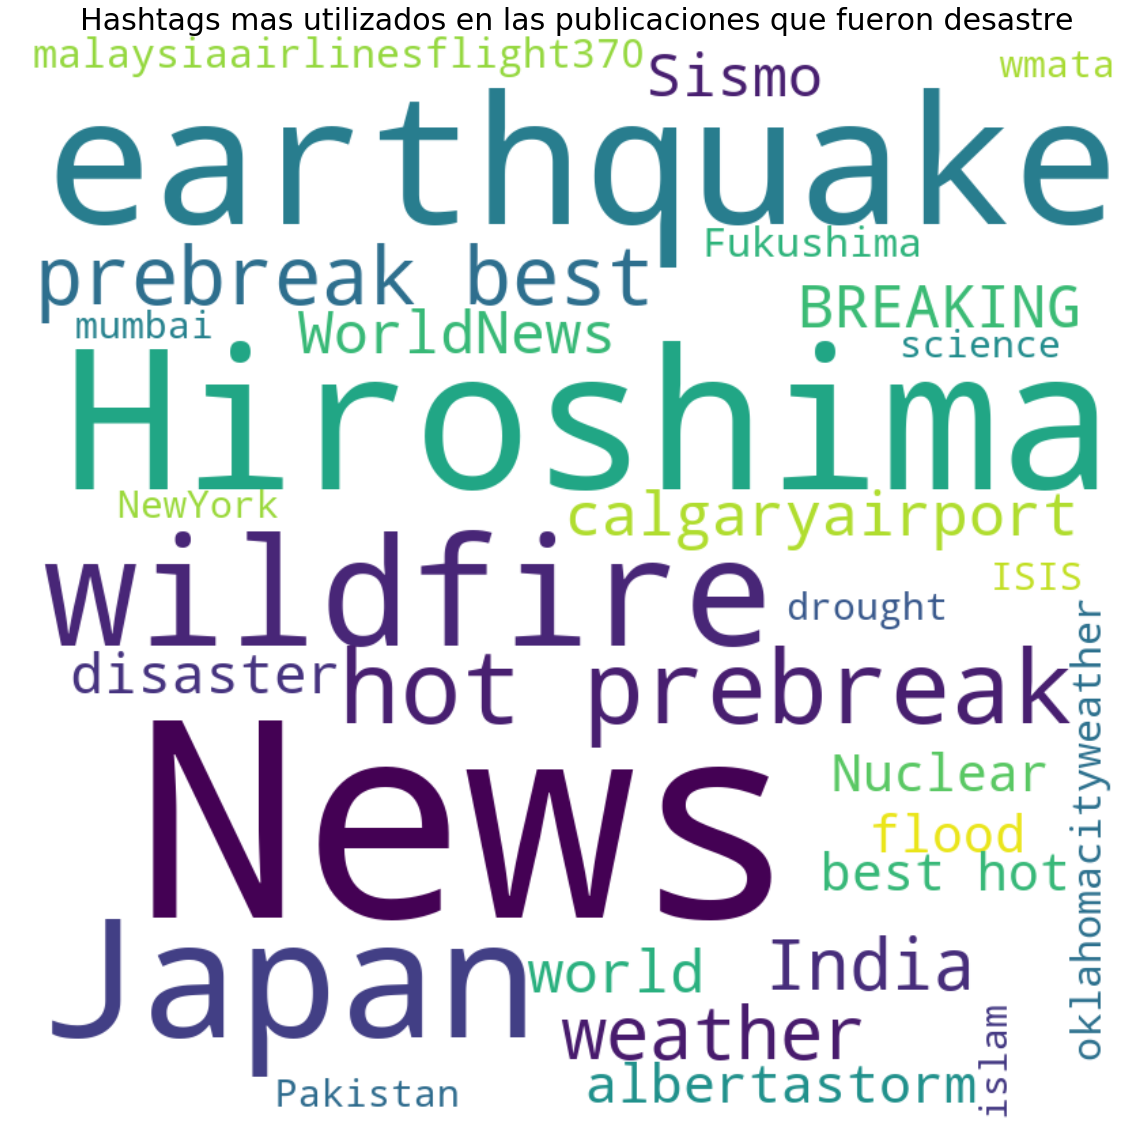

In [14]:
wordcloud2 = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="white").generate(textDesastre)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en las publicaciones que fueron desastre',size=30)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_1.png",bbox_inch='tight')
plt.show()

In [15]:
textNoDesastre=datos[(datos['target']==0)&(datos['hashtags']!="")]['hashtags'].agg('sum')

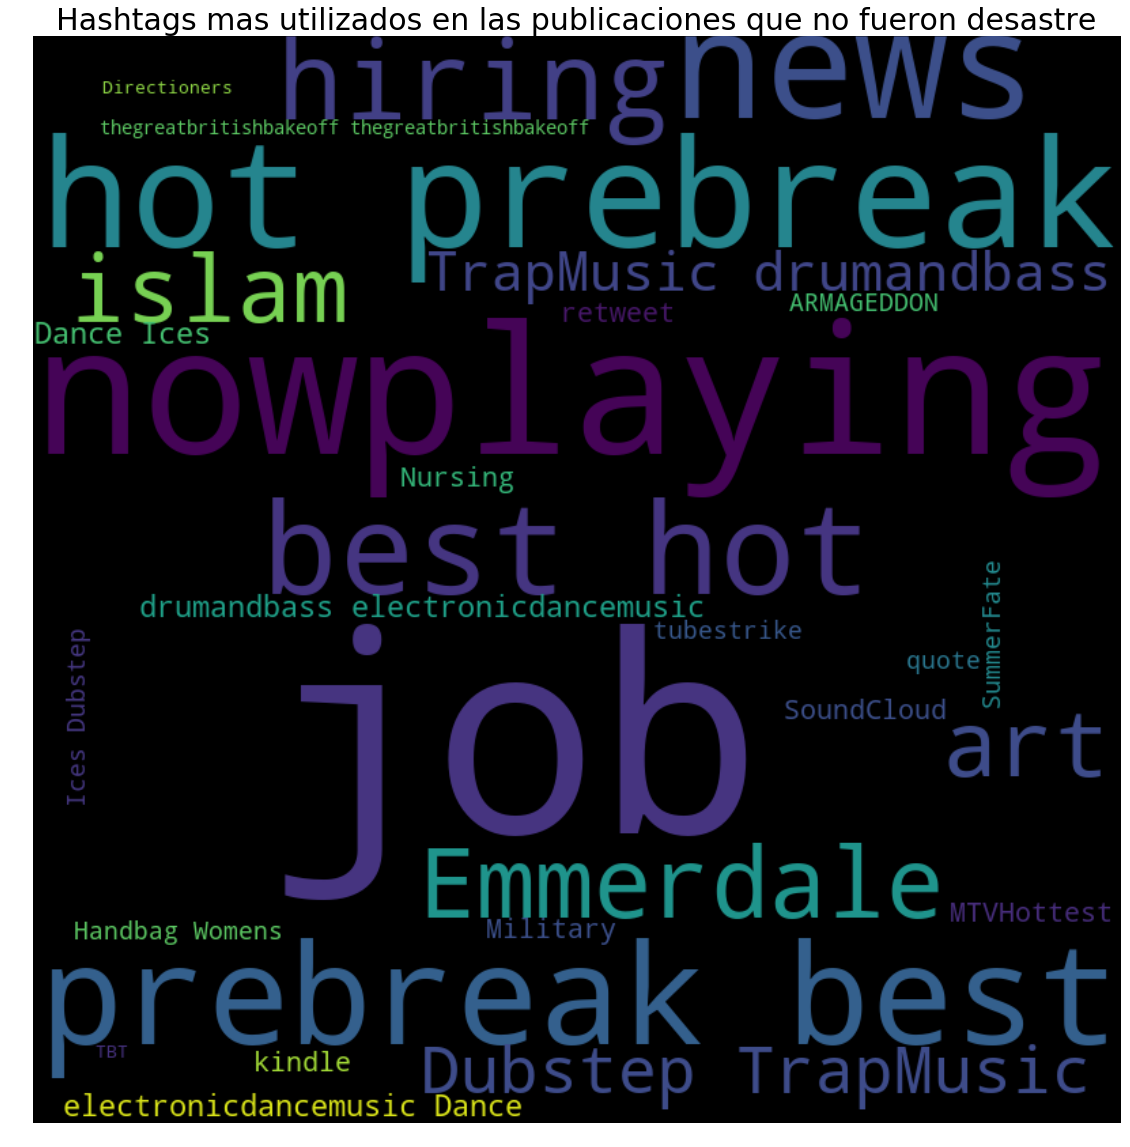

In [17]:
wordcloud2 = WordCloud(width=800, height=800,max_words=30, margin=0,background_color="black").generate(textNoDesastre)
plt.figure(figsize=[25,20])
plt.title('Hashtags mas utilizados en las publicaciones que no fueron desastre',size=30)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
#plt.savefig("analisis_hashtags_2.png",bbox_inch='tight')
plt.show()